## Setup

In [2]:
import os
import datetime
import numpy as np
import sklearn

import matplotlib.pyplot as plt

In [3]:
driver_ids = []
with open('driver_ids.csv', 'r') as f:
    driver_ids_raw = f.readlines()[1:]
    for row in driver_ids_raw:
        parsed_row = row[:-1].split(',')
        parsed_row[1] = datetime.datetime.strptime(parsed_row[1], '%Y-%m-%d %H:%M:%S')
        driver_ids.append(parsed_row)
    
print("Number of drivers:", len(driver_ids))

driver_ids_map = {}
for driver_id, onboard_date in driver_ids:
    driver_ids_map[driver_id] = onboard_date

Number of drivers: 937


In [4]:
ride_ids = []
with open('ride_ids.csv', 'r') as f:
    ride_ids_raw = f.readlines()[1:]
    for row in ride_ids_raw:
        parsed_row = row[:-1].split(',')
        for i in range(2,5):
            parsed_row[i] = int(parsed_row[i]) 
        ride_ids.append(parsed_row)

print("Number of rides:", len(ride_ids))

ride_ids_map = {}
for driver_id, ride_id, ride_distance, ride_duration, ride_prime_time in ride_ids:
    ride_ids_map[ride_id] = [ride_distance, ride_duration, ride_prime_time]
    
driver_to_ride = {}
ride_to_driver = {}
for driver_id, ride_id, ride_distance, ride_duration, ride_prime_time in ride_ids:
    driver_to_ride.setdefault(driver_id, []).append(ride_id)
    ride_to_driver[driver_id] = ride_id

Number of rides: 193502


In [5]:
ride_timestamps = []
with open('ride_timestamps.csv', 'r') as f:
    ride_timestamps_raw = f.readlines()[1:]
    for row in ride_timestamps_raw:
        parsed_row = row[:-1].split(',')
        try:
            parsed_row[2] = datetime.datetime.strptime(parsed_row[2], '%Y-%m-%d %H:%M:%S')
        except:
            print(row)
            # TODO: 72f0fa0bd86800e9da5c4dced32c8735 has a missing timestamp with arrived at.
            # It is currently hard coded in using the picked up at time. This needs to be checked.
            parsed_row[2] = datetime.datetime.strptime("2016-04-20 12:02:20", '%Y-%m-%d %H:%M:%S')
        ride_timestamps.append(parsed_row)
    
print("Number of rides:", len(ride_timestamps))

ride_timestamps_map = {}
for ride_id, event, timestamp in ride_timestamps:
    #ride_timestamps_map[ride_id] = [event, timestamp]
    ride_timestamps_map.setdefault(ride_id, {})[event] = timestamp

72f0fa0bd86800e9da5c4dced32c8735,arrived_at,

Number of rides: 970405


In [6]:
data_structures = '''
List of Data Structures

driver_ids: 937 rows of ['driver_id', driver_onboard_date (datetime)]
driver_ids_map: 'driver_id' -> driver_onboard_date (datetime)

ride_ids: 193502 rows of ['driver_id', 'ride_id', ride_distance (int, m), ride_duration (int, s), ride_prime_time (int)]
ride_ids_map: 'ride_id' -> [ride_distance (int, m), ride_duration (int, s), ride_prime_time]
driver_to_ride: 'driver_id' -> list of ride_ids
ride_to_driver: 'ride_id' -> 'driver_id'

ride_timestamps: 970405 rows of ['ride_id', 'event', timestamp (datetime)]
ride_timestamps_map: 'ride_id' -> ('event' -> timestamp (datetime))

list of prime times: [0, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 500]
list of events: ['requested_at', 'dropped_off_at', 'accepted_at', 'picked_up_at', 'arrived_at']
'''
print(data_structures)


List of Data Structures

driver_ids: 937 rows of ['driver_id', driver_onboard_date (datetime)]
driver_ids_map: 'driver_id' -> driver_onboard_date (datetime)

ride_ids: 193502 rows of ['driver_id', 'ride_id', ride_distance (int, m), ride_duration (int, s), ride_prime_time (int)]
ride_ids_map: 'ride_id' -> [ride_distance (int, m), ride_duration (int, s), ride_prime_time]
driver_to_ride: 'driver_id' -> list of ride_ids
ride_to_driver: 'ride_id' -> 'driver_id'

ride_timestamps: 970405 rows of ['ride_id', 'event', timestamp (datetime)]
ride_timestamps_map: 'ride_id' -> ('event' -> timestamp (datetime))

list of prime times: [0, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 500]
list of events: ['requested_at', 'dropped_off_at', 'accepted_at', 'picked_up_at', 'arrived_at']



## Average Projected Driver Lifetime

In [7]:
driver_time = {}
for driver_id, onboard_date in driver_ids:
    max_time = 0
    for ride_id in driver_to_ride.get(driver_id,[]):
        try:
            max_time = max(max_time, (ride_timestamps_map[ride_id]['arrived_at'] - onboard_date).days)
        except: # Note: This happens a lot...
            # print("Missing data... ride_id:",ride_id,"does not exist.")
            pass
    driver_time[driver_id] = max_time

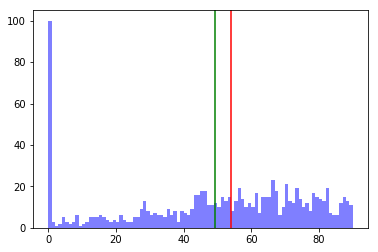

Lifetimes Mean: 49.200640341515474 Lifetimes Median: 54.0


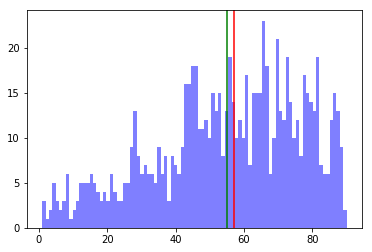

Clean Lifetimes Mean: 55.07885304659498 Clean Lifetimes Median: 57.0


In [41]:
lifetimes = list(driver_time.values())
lifetimes_mean = np.mean(np.asarray(lifetimes))
lifetimes_median = np.median(np.asarray(lifetimes))

num_bins = 90
n, bins, patches = plt.hist(lifetimes, num_bins, facecolor='blue', alpha=0.5)
plt.axvline(x=lifetimes_mean, color='green')
plt.axvline(x=lifetimes_median, color='red')
plt.show()
print("Lifetimes Mean:", lifetimes_mean, "Lifetimes Median:", lifetimes_median)

clean_lifetimes = [x for x in lifetimes if x != 0]
clean_lifetimes_mean = np.mean(np.asarray(real_lifetimes))
clean_lifetimes_median = np.median(np.asarray(real_lifetimes))
n, bins, patches = plt.hist(real_lifetimes, num_bins, facecolor='blue', alpha=0.5)
plt.axvline(x=clean_lifetimes_mean, color='green')
plt.axvline(x=clean_lifetimes_median, color='red')
plt.show()
print("Clean Lifetimes Mean:", clean_lifetimes_mean, "Clean Lifetimes Median:", clean_lifetimes_median)